<img src="./lecture_image/00_title.png">

<table border=1 width=100%>
    <tr><td style="border: 1px solid black; width:600px; height:30px; text-align: center;"><font size=4 color=blue><b>[23차시] 학습목표</b></font></td></tr>       
    <tr><td style="border: 1px solid black; text-align: left;"><font size=3>
○ OCR 방법에 대해 이해할 수 있다<br><br>
○ Tessaract를 이용하여 문자를 인식할 수 있다<br><br>
○ EasyOCR 이용한 문자를 인식할 수 있다<br><br>        
○ 기타 OCR 라이브러리를 사용하여 문자을 인식할 수 있다     
        </font></td></tr>   
</table>

# OCR

- 참고 : https://meissa.tistory.com/80?category=962022

## 개념 

- OCR  =Text detection + Text recognition

<img src="./lecture_image/23_ocr01.png" width=70%>

  - Text detection : Object detection의 문자 찾아내기 확장 버전(Segmentation 및 문자특성 고려)
    - 이미지 내에서 문자를 검출해낼 때엔 검출하기 위한 최소 단위를 설정
    - 단어 단위의 탐지 : Object detection의 Regression기반의 Detection방법
      - Anchor를 정의하고 단어의 유무, Bounding box의 크기를 추정해서 단어를 찾음
      - (예) TextBoxes 방법
    - 글자 단위의 방식 : 글자인 영역을 Segmentation하는 방법으로 접근
      - (예) PixelLink 방법
    - 두 가지 방법을 모두 활용한 방법이 있음
      - CRAFT : Character 단위로 문자의 위치를 찾아낸 뒤 이를 연결하는 방식을 Segmentation기반으로 구현한 방법
      
      - PMTD(Pyramid Mask Text Detector) : Mask-RCNN으로 Text영역 검출 → 단어의 사각형 배치 특성을 반영한 피라미드 형태의 Score map을 활용하여 기존의 부정확한 Mask 영역을 보완
        - Mask-RCNN의 경우 단어 영역이 Box head에 의해 빨간색으로 잡히면 우측 처럼 boundary를 모두 Text 영역으로 잡지만, PMTD는 이를 보완하여 전체 Text 영역을 검출
        
<img src="./lecture_image/23_ocr03.png" width=60%> 

  - Text recognition : 검출된 영역의 문자가 무엇인지를 인식해 내는 과정
    - Unsegmented Data : 분리에 드는 비용이 비싸거나 어려워 Segmentation이 되어있지 않은 데이터
      - 특징 : segment되어 있지 않은 하위데이터들끼리 시퀀스(sequence)를 이루고 있다는 점
    - CRNN : CNN으로 문자의 특성을 검출하고 Map-To-Sequence로 변환한 후에 Bidirectional LSTM으로 문자를 인식하는 방법

## Tessaract 
- 1980년대 최초로 개발된 OCR 알고리즘 중 하나


- 다운로드 : https://github.com/UB-Mannheim/tesseract/wiki


- tesseract-ocr-w64-setup-v5.0.0-alpha.20201127.exe 파일 다운로드 및 설치

- Additional language data 체크

In [1]:
!pip install pytesseract

In [2]:
#실습
import pytesseract

#설치 폴더 설정
pytesseract.pytesseract.tesseract_cmd=r"C:\Program Files\Tesseract-OCR\tesseract.exe"

(-0.5, 417.5, 466.5, -0.5)

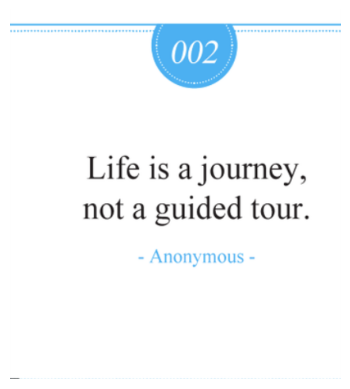

In [4]:
#실습
import cv2
import matplotlib.pyplot as plt

img=cv2.imread("./image/text.png")
img=cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.imshow(img)
plt.axis("off")

In [5]:
#실습
text=pytesseract.image_to_string(img,lang="eng")
print(text)

Life is a journey,
not a guided tour.

- Anonymous -



In [7]:
img2=cv2.imread("./image/story.png")
img2=cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)
KOREAN=pytesseract.image_to_string(img2, lang="kor")
print(KOREAN)

소년

여기저기서 단풍잎 같은 슬픈 가을이 뚝뚝 떨어진다. 단풍잎
떨어져 나온 자리마다 봄을 마련해 놓고 나못가지 위에 하늘이
펼쳐 있다. 가만히 하늘을 들여다보려면 눈썸에 파란 물감이
든다. 두 손으로 따뜻한 볼을 쓸어 보면 손바닥에도 파란 물감
이 묻어난다. 다시 손바닥을 들여다본다. 손금에는 맑은 강물
이 흐르고, 맑은 강물이 흐르고, 강물 속에는 사랑처럼 슬픈 얼
굴ㅡ- 아름다운 순이의 얼굴이 어린다. 소년은 황홀히 눈을
감아 본다. 그래도 맑은 강물은 흘러 사랑처럼 슬픈 얼굴--
아름다운 순이의 얼굴은 어린다.



- trssract는 이진 이미지로 변환해서 인식을 하면 성능을 높일 수 있다.

(-0.5, 702.5, 173.5, -0.5)

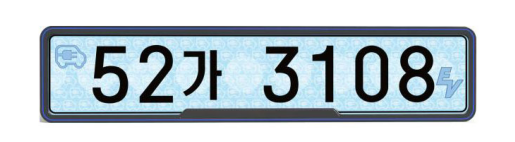

In [8]:
import cv2
import matplotlib.pyplot as plt

img=cv2.imread("./image/car.png")
img=cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.imshow(img)
plt.axis("off")

(-0.5, 702.5, 173.5, -0.5)

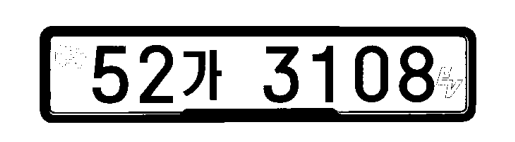

In [10]:
#실습
img_gray=cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
_,img_th=cv2.threshold(img_gray,150,255,cv2.THRESH_BINARY)

plt.imshow(img_th, cmap="gray")
plt.axis("off")

In [11]:
text=pytesseract.image_to_string(img,lang="eng")
print(text)

### 한글 이미지 인식

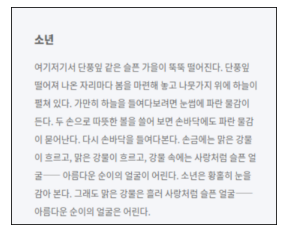

In [6]:
#실습

In [7]:
#실습

소년

여기저기서 단풍잎 같은 슬픈 가을이 뚝뚝 떨어진다. 단풍잎
떨어져 나온 자리마다 봄을 마련해 놓고 나못가지 위에 하늘이
펼쳐 있다. 가만히 하늘을 들여다보려면 눈썸에 파란 물감이
든다. 두 손으로 따뜻한 볼을 쓸어 보면 손바닥에도 파란 물감
이 묻어난다. 다시 손바닥을 들여다본다. 손금에는 맑은 강물
이 흐르고, 맑은 강물이 흐르고, 강물 속에는 사랑처럼 슬픈 얼
굴ㅡ- 아름다운 순이의 얼굴이 어린다. 소년은 황홀히 눈을
감아 본다. 그래도 맑은 강물은 흘러 사랑처럼 슬픈 얼굴--
아름다운 순이의 얼굴은 어린다.



### 포스터 한글 이미지 인식

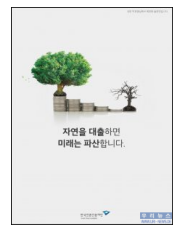

In [16]:
#실습

In [17]:
#실습

자연을 대출하면
미래는 파산합니다

  



### 번호판 인식

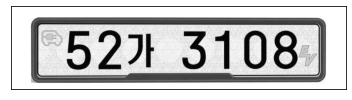

In [21]:
#실습

In [22]:
#실습

527 3108.|



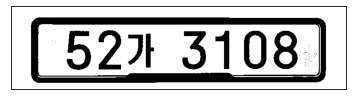

In [8]:
#실습

In [9]:
#실습

| 52가 3108



## EasyOCR
- 문자영역 인식, 문자 인식을 쉽게 할 수 있게 하는 파이썬 라이브러리
- 간단하고 직관적
- 80개 이상의 언어를 지원
- 문자 추출은 CRAFT를 문자 인식은 CRNN을 사용


- 수행 결과로 텍스트의 바운딩 박스 좌표와 읽은 문자를 반환


- 참고 : https://github.com/JaidedAI/EasyOCR

In [12]:
#!pip uninstall opencv-python
!pip install opencv-python==4.5.4.60 easyocr 

     ---------------------------------------- 35.1/35.1 MB 1.4 MB/s eta 0:00:00
     ---------------------------------------- 2.9/2.9 MB 1.8 MB/s eta 0:00:00
     ---------------------------------------- 12.1/12.1 MB 1.1 MB/s eta 0:00:00
     ---------------------------------------- 35.0/35.0 MB 1.7 MB/s eta 0:00:00
     ---------------------------------------- 1.3/1.3 MB 2.8 MB/s eta 0:00:00
     ---------------------------------------- 94.3/94.3 kB 1.4 MB/s eta 0:00:00
     -------------------------------------- 292.6/292.6 kB 2.6 MB/s eta 0:00:00
     ---------------------------------------- 1.9/1.9 MB 1.1 MB/s eta 0:00:00
     ------------------------------------- 178.9/178.9 kB 11.2 MB/s eta 0:00:00
     ---------------------------------------- 4.2/4.2 MB 2.2 MB/s eta 0:00:00
  Attempting uninstall: opencv-python
    Found existing installation: opencv-python 4.6.0.66
    Uninstalling opencv-python-4.6.0.66:
      Successfully uninstalled opencv-python-4.6.0.66


ERROR: Could not install packages due to an OSError: [WinError 5] 액세스가 거부되었습니다: 'C:\\Users\\AI\\AppData\\Local\\Temp\\pip-uninstall-xcf3t2nh\\cv2.pyd'
Consider using the `--user` option or check the permissions.



(-0.5, 199.5, 149.5, -0.5)

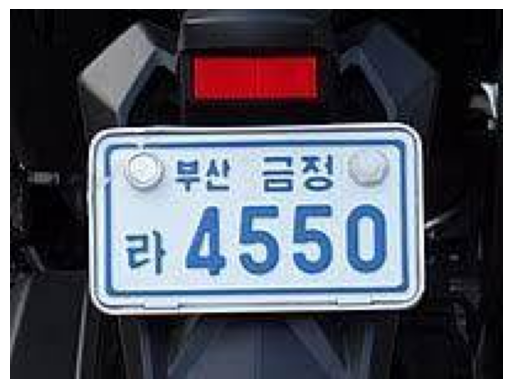

In [13]:
#실습
import cv2
import matplotlib.pyplot as plt

img=cv2.imread("./image/car4.jfif")
img=cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.imshow(img)
plt.axis("off")

In [14]:
#실습
import easyocr

# 인식할 언어 설정
reader=easyocr.Reader(["ko","en"])

#글씨 영역, 인식된 글씨, 정확도
result=reader.readtext(img)
result

ModuleNotFoundError: No module named 'easyocr'

## PaddleOCR

- 참고 
  - https://learnopencv.com/optical-character-recognition-using-paddleocr/?ck_subscriber_id=1390420859
  - https://github.com/PaddlePaddle/PaddleOCR


- 텍스트 감지, 텍스트 방향 분류기 및 텍스트 인식을 제공
- PP-OCR 및 SRN, NRTR 등과 같은 최신 알고리즘을 포함하여 툴킷에 다양한 모델을 제공
- 80 개 이상의 언어를 지원


<img src="./lecture_image/23_paddleocr1.png" width=80%> 

- 설치

In [15]:
!conda create -n paddleocr python==3.7

'conda'은(는) 내부 또는 외부 명령, 실행할 수 있는 프로그램, 또는
배치 파일이 아닙니다.


In [ ]:
!activate paddleocr

In [1]:
!git clone https://gitee.com/paddlepaddle/PaddleOCR.git

fatal: destination path 'PaddleOCR' already exists and is not an empty directory.


In [2]:
!pip install -r ./PaddleOCR/requirements.txt

ERROR: Could not open requirements file: [Errno 2] No such file or directory: './PaddleOCR/requirements.txt'


In [3]:
# !pip install paddlepaddle-gpu paddleocr --user
!pip install paddlepaddle paddleocr --user

^C


- 라이브러리 및 학습된 모델 로딩

In [21]:
#실습
from paddleocr import PaddleOCR, draw_ocr
import os
import cv2
import matplotlib.pyplot as plt

#lang:ch,en, french,germen
ocr=PaddleOCR(use_angle_cls=True, lang="en")

[2022/09/23 16:12:31] ppocr DEBUG: Namespace(alpha=1.0, benchmark=False, beta=1.0, cls_batch_num=6, cls_image_shape='3, 48, 192', cls_model_dir='C:\\Users\\AI/.paddleocr/whl\\cls\\ch_ppocr_mobile_v2.0_cls_infer', cls_thresh=0.9, cpu_threads=10, crop_res_save_dir='./output', det=True, det_algorithm='DB', det_db_box_thresh=0.6, det_db_score_mode='fast', det_db_thresh=0.3, det_db_unclip_ratio=1.5, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_east_score_thresh=0.8, det_fce_box_type='poly', det_limit_side_len=960, det_limit_type='max', det_model_dir='C:\\Users\\AI/.paddleocr/whl\\det\\en\\en_PP-OCRv3_det_infer', det_pse_box_thresh=0.85, det_pse_box_type='quad', det_pse_min_area=16, det_pse_scale=1, det_pse_thresh=0, det_sast_nms_thresh=0.2, det_sast_polygon=False, det_sast_score_thresh=0.5, draw_img_save_dir='./inference_results', drop_score=0.5, e2e_algorithm='PGNet', e2e_char_dict_path='./ppocr/utils/ic15_dict.txt', e2e_limit_side_len=768, e2e_limit_type='max', e2e_model_dir=No

- 인식

In [5]:
#실습
# 출력 함수 
def result_ocr(img_path, result, font):
    image=cv2.imread(img_path)
    image=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
    
    #result에서 텍스트 위치, 내용, 정확도를 가져와서 저장
    boxes=[line[0] for line in result]
    txts=[line[1][0] for line in result]
    conf=[line[1][1] for line in result]
    
    #ocr 결과 출력함수를 이용하여 출력
    im_show=draw_ocr(image, boxes, txts, conf, font_path=font)
    
    plt.figure(figsize=(12,12))
    plt.imshow(im_show)
    plt.axis("off")

- 영수증 인식

In [1]:
import 

SyntaxError: invalid syntax (2494350585.py, line 1)

[2022/09/23 15:46:57] ppocr DEBUG: dt_boxes num : 34, elapse : 0.13364267349243164
[2022/09/23 15:46:57] ppocr DEBUG: cls num  : 34, elapse : 0.38796234130859375
[2022/09/23 15:47:01] ppocr DEBUG: rec_res num  : 34, elapse : 4.1049957275390625


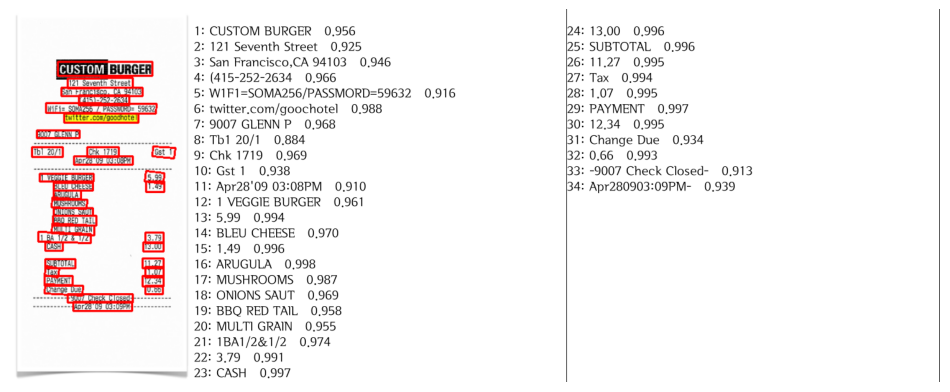

In [11]:
#실습
img_path="./image/receipt1.png"

result=ocr.ocr(img_path)

font="./image/SeoulHangangM.ttf"

result_ocr(img_path, result,  font)

- ID 카드 인식

[2022/09/23 15:48:04] ppocr DEBUG: dt_boxes num : 13, elapse : 0.34568142890930176
[2022/09/23 15:48:04] ppocr DEBUG: cls num  : 13, elapse : 0.14917612075805664
[2022/09/23 15:48:06] ppocr DEBUG: rec_res num  : 13, elapse : 2.3468117713928223


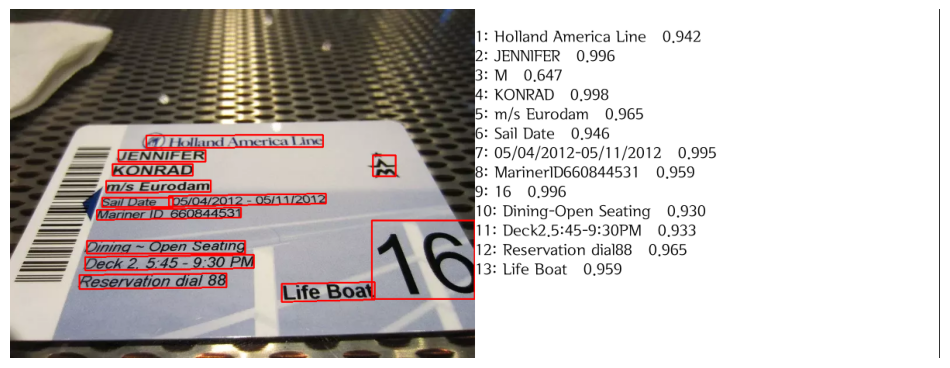

In [13]:
#실습

img_path="./image/id-card.png"

result=ocr.ocr(img_path)

font="./image/SeoulHangangM.ttf"

result_ocr(img_path, result,  font)

- 손글씨 인식

[2022/09/23 15:48:49] ppocr DEBUG: dt_boxes num : 5, elapse : 0.7011535167694092
[2022/09/23 15:48:49] ppocr DEBUG: cls num  : 5, elapse : 0.09374475479125977
[2022/09/23 15:48:50] ppocr DEBUG: rec_res num  : 5, elapse : 0.6085443496704102


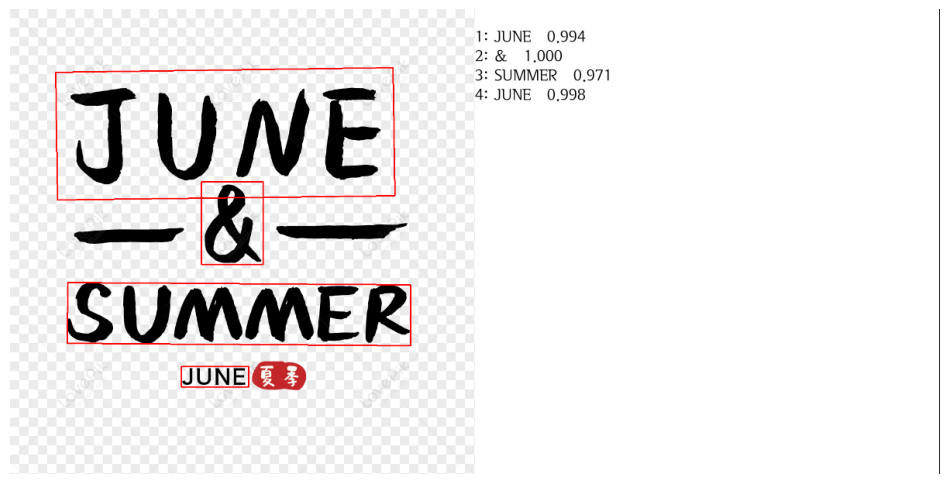

In [14]:
#실습
img_path="./image/hand_english.png"

result=ocr.ocr(img_path)

font="./image/SeoulHangangM.ttf"

result_ocr(img_path, result,  font)

- 자동차 번호판

[2022/09/23 15:58:19] ppocr DEBUG: dt_boxes num : 1, elapse : 0.18166232109069824
[2022/09/23 15:58:19] ppocr DEBUG: cls num  : 1, elapse : 0.013962745666503906
[2022/09/23 15:58:19] ppocr DEBUG: rec_res num  : 1, elapse : 0.10233759880065918


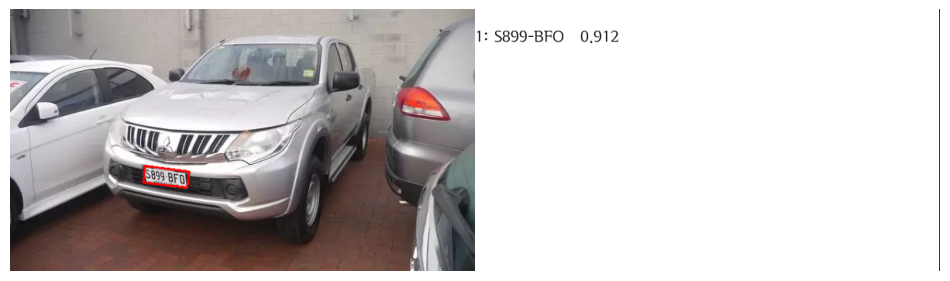

In [17]:
#실습
img_path="./image/car_number.png"

result=ocr.ocr(img_path)

font="./image/SeoulHangangM.ttf"

result_ocr(img_path, result,  font)

- 도로 표지판

[2022/09/23 15:57:54] ppocr DEBUG: dt_boxes num : 10, elapse : 0.4702482223510742
[2022/09/23 15:57:54] ppocr DEBUG: cls num  : 10, elapse : 0.11619114875793457
[2022/09/23 15:57:55] ppocr DEBUG: rec_res num  : 10, elapse : 1.062199592590332


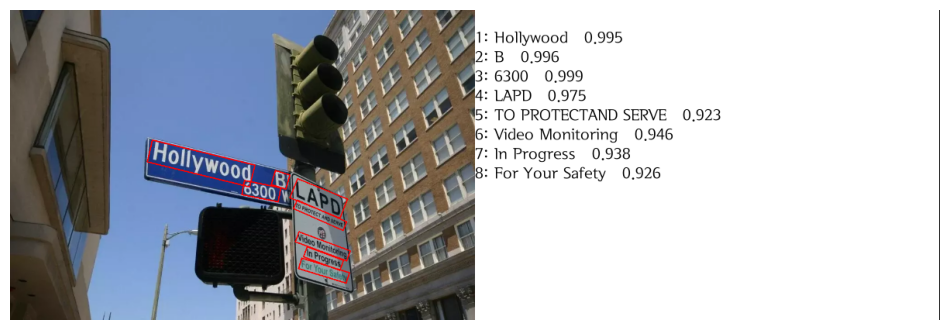

In [16]:
#실습
img_path="./image/load_sign.png"

result=ocr.ocr(img_path)

font="./image/SeoulHangangM.ttf"

result_ocr(img_path, result,  font)

[2022/09/23 16:07:42] ppocr DEBUG: dt_boxes num : 4, elapse : 0.10990309715270996
[2022/09/23 16:07:42] ppocr DEBUG: cls num  : 4, elapse : 0.04687666893005371
[2022/09/23 16:07:43] ppocr DEBUG: rec_res num  : 4, elapse : 0.8252766132354736


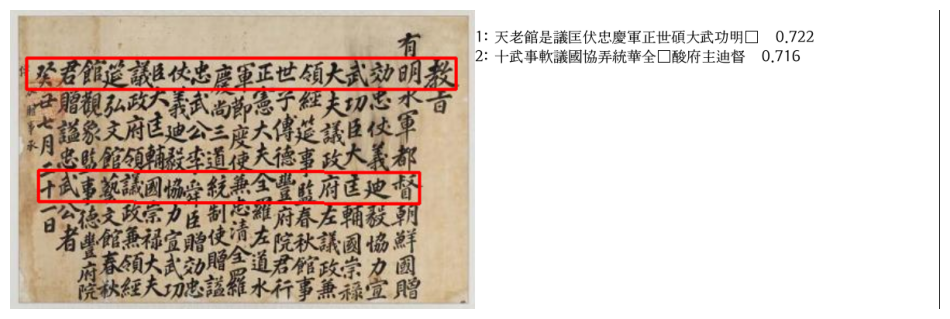

In [20]:
#실습
img_path="./image/hanja.jpg"

result=ocr.ocr(img_path)

font="./image/SeoulHangangM.ttf"

result_ocr(img_path, result,  font)

- 곡선 텍스트

[2022/09/23 16:13:14] ppocr DEBUG: dt_boxes num : 2, elapse : 0.5161964893341064
[2022/09/23 16:13:14] ppocr DEBUG: cls num  : 2, elapse : 0.023935317993164062
[2022/09/23 16:13:14] ppocr DEBUG: rec_res num  : 2, elapse : 0.2195749282836914


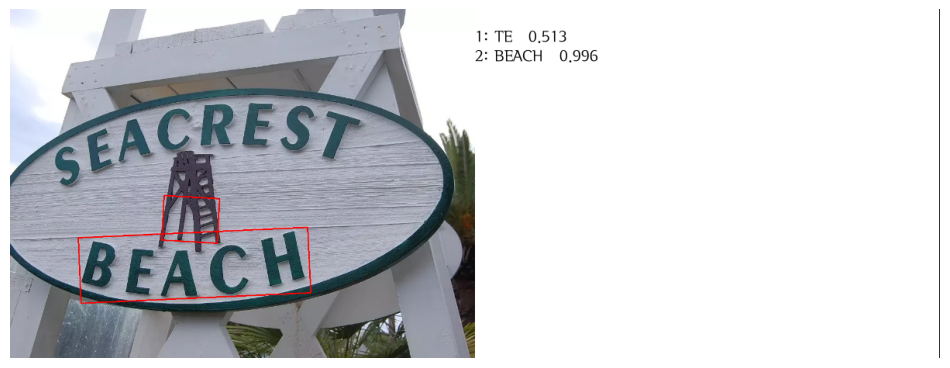

In [23]:
#실습
img_path="./image/curved_text1.png"

result=ocr.ocr(img_path)

font="./image/SeoulHangangM.ttf"

result_ocr(img_path, result,  font)

## 구글 OCR API 활용

- 참고 : https://cloud.google.com/vision/docs/quickstart

## Naver 클로버 OCR

- 참고 : https://clova.ai/ocr?lang=ko

<table border=1 width=100%>
    <tr><td style="border: 1px solid black; width:600px; height:40px; text-align: center;"><font size=4 color=blue><b>[23차시] 정리하기</b></font></td></tr>       
    <tr><td style="border: 1px solid black; text-align: left;"><font size=3>○            
        </font></td></tr>   
</table>